# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  Dataset dapat diperoleh dari Kaggle
2. **Nama Dataset**  :  Analisis Biaya Asuransi Kesehatan (Medical Insurance Cost)
3. **Deskripsi Dataset** : Dataset ini berisi data biaya asuransi kesehatan dari 1.338 individu di Amerika Serikat. Data ini mencakup berbagai variabel demografis dan faktor kesehatan yang digunakan untuk menentukan besarnya tagihan medis tahunan nasabah.

Berikut adalah rincian variabel yang terdapat dalam dataset:
- **age**: Usia penerima manfaat utama (dalam tahun).
- **sex**: Jenis kelamin nasabah (laki-laki, perempuan).
- **bmi**: Body Mass Index (Indeks Massa Tubuh), yaitu ukuran lemak tubuh berdasarkan berat badan terhadap tinggi badan ($kg/m^2$).
- **children**: Jumlah anak atau tanggungan yang dicakup oleh asuransi kesehatan.smoker: Status merokok nasabah (ya, tidak).
- **region**: Wilayah tempat tinggal nasabah di Amerika Serikat (northeast, northwest, southeast, southwest).
- **charges**: (Target) Biaya medis yang ditagihkan kepada nasabah.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Library
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load data
df = pd.read_csv("/content/drive/MyDrive/Insurance/insurance.csv")


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Distribusi Kolom Numerik:


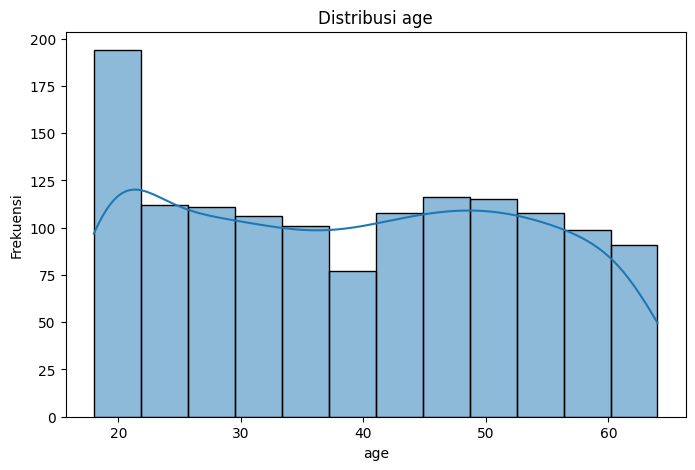

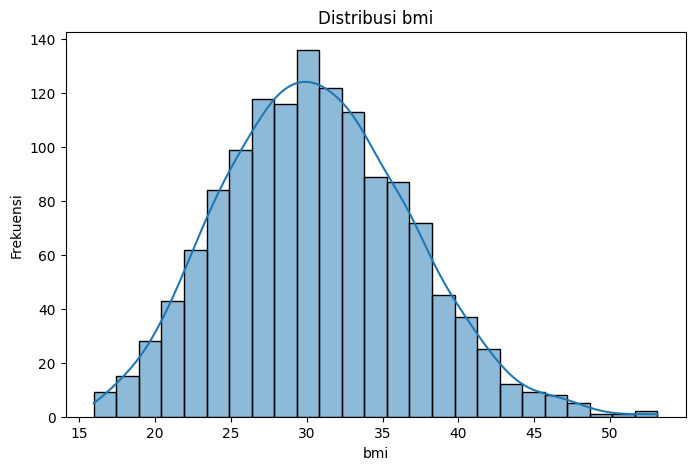

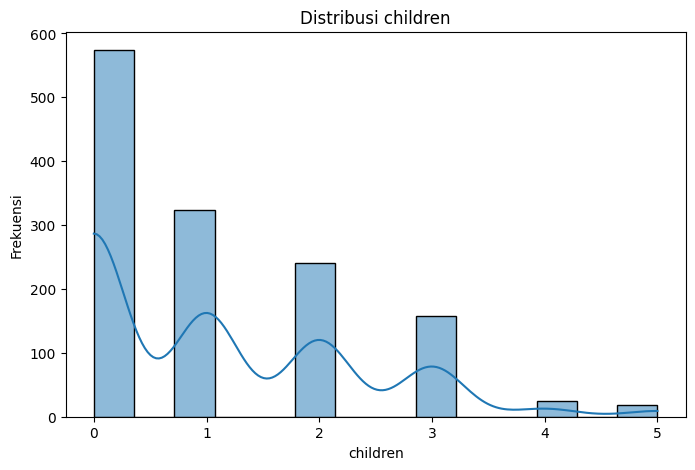

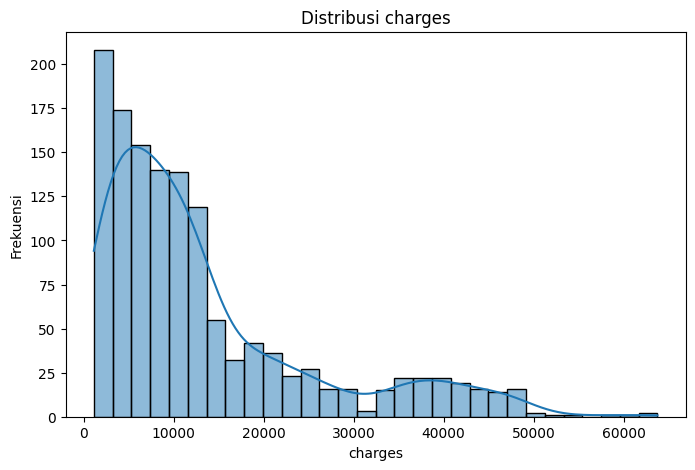


Distribusi Kolom Kategorikal:


/tmp/ipython-input-1665472984.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


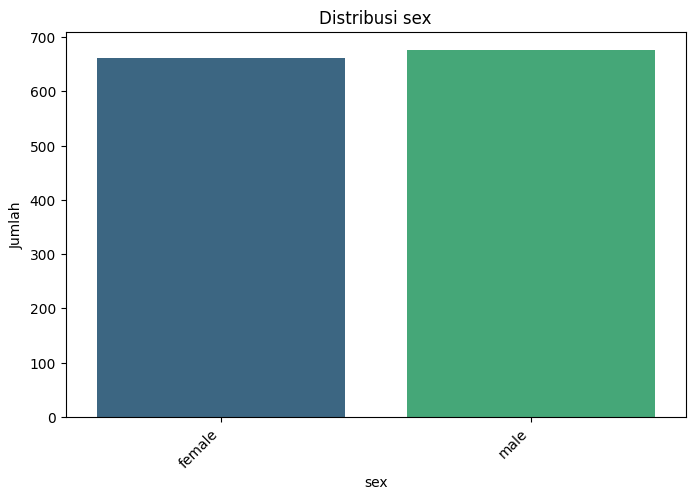

/tmp/ipython-input-1665472984.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


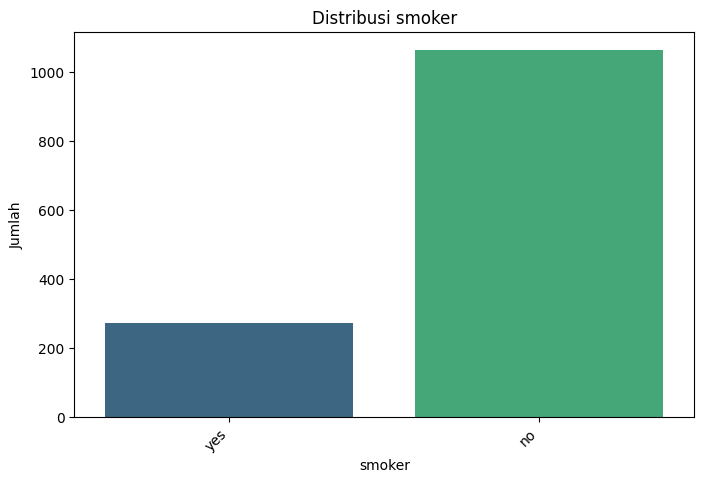

/tmp/ipython-input-1665472984.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


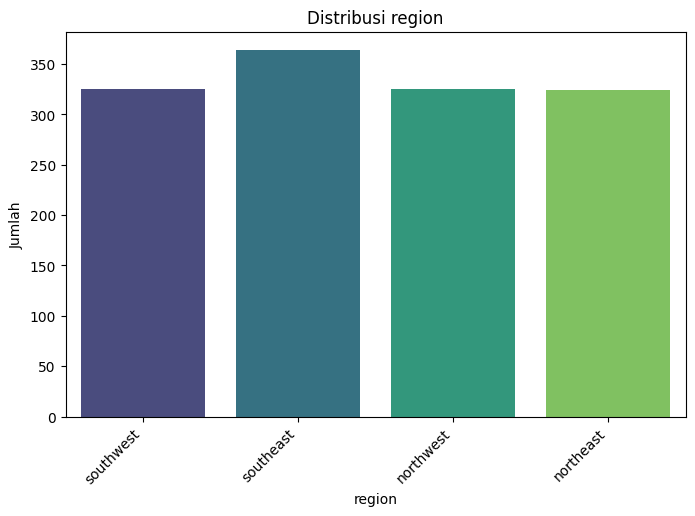

In [11]:
# #cek distribusi kolom
# Memisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Distribusi Kolom Numerik:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

print("\nDistribusi Kolom Kategorikal:")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [12]:
#mencari missing value
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [13]:
#mencari data duplicate
df.duplicated().sum()

np.int64(1)

In [14]:
#outlier
print(df.describe(include='number'))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f"ukuran data setelah pembersihan: {df.shape}")

ukuran data setelah pembersihan: (1337, 7)


In [19]:
# Memilih kolom numerik untuk normalisasi
numerical_cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns

# Mengecualikan kolom 'charges' jika itu adalah target dan tidak ingin dinormalisasi bersama fitur
if 'charges' in numerical_cols_to_scale:
    numerical_cols_to_scale = numerical_cols_to_scale.drop('charges')

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi ke kolom numerik yang dipilih
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Data numerik setelah normalisasi:")
display(df[numerical_cols_to_scale].head())

Data numerik setelah normalisasi:


,age,bmi,children
0,-1.440418,-0.453160,-0.909234
1,-1.511647,0.509422,-0.079442
2,-0.799350,0.383155,1.580143
3,-0.443201,-1.305052,-0.909234
4,-0.514431,-0.292456,-0.909234


In [29]:
# Memilih kolom kategorikal untuk encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Melakukan one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data setelah encoding kategorikal:")
display(df_encoded.head())

Data setelah encoding kategorikal:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,1725.55230,True,False,False,True,False
2,-0.799350,0.383155,1.580143,4449.46200,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,21984.47061,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,3866.85520,True,False,True,False,False
